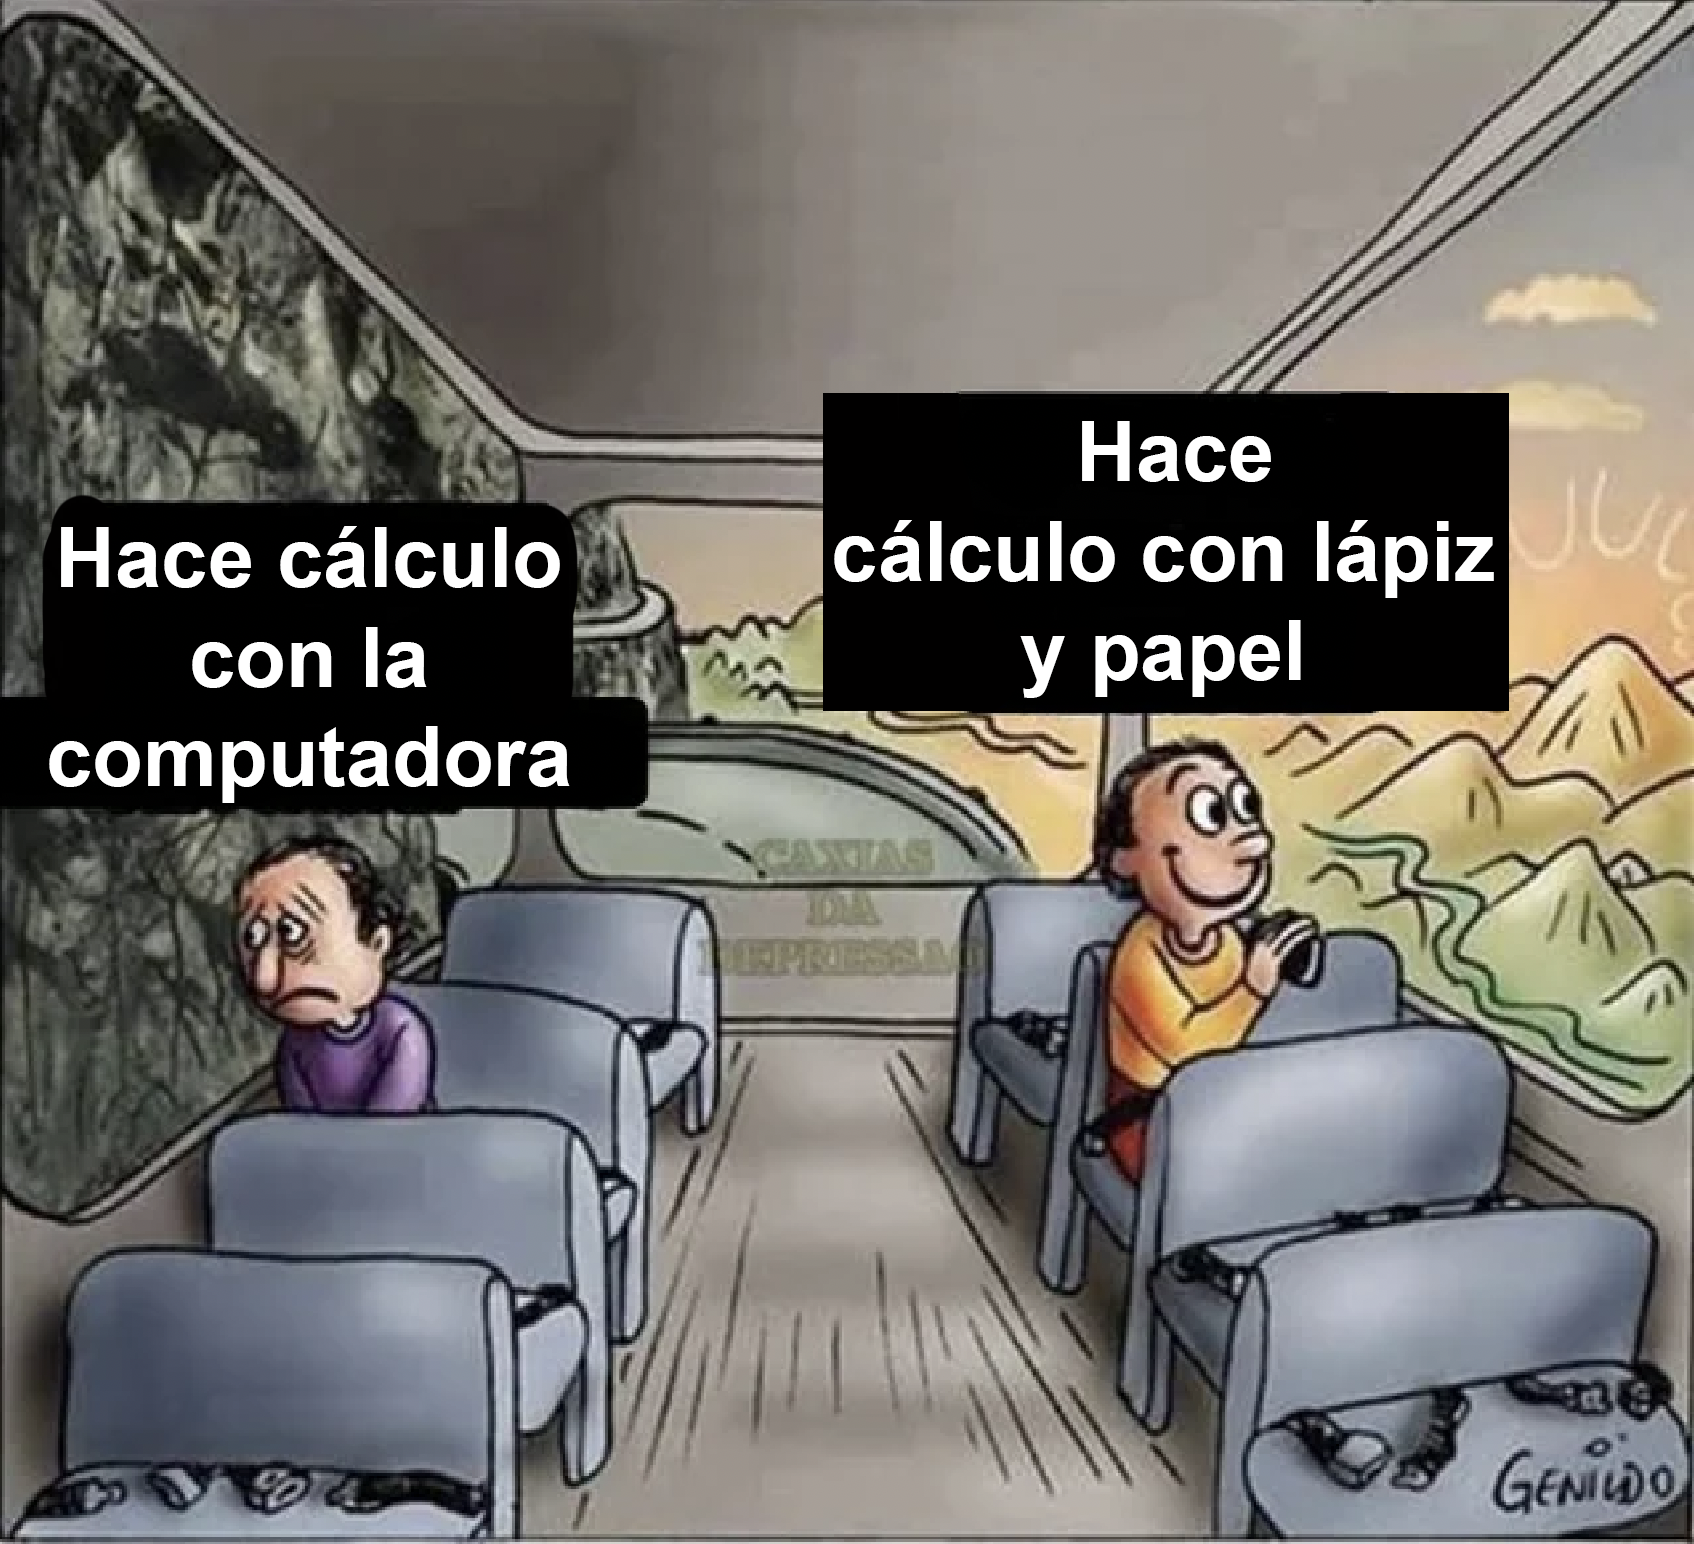

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.sin(np.pi)

1.2246467991473532e-16

In [3]:
0.1+0.2

0.30000000000000004

In [4]:
# Máximo número flotante que puede representar Python:
print('Máximo número flotante que puede representar Python: ', np.finfo(np.float).max, '\n')

# Mínimo flotante positivo normalizado que puede representar Python:
print('Mínimo flotante positivo [normalizado] que puede representar Python: ', np.finfo(np.float).tiny, '\n')

# Mínimo flotante positivo [subnormal] que puede representar Python:
print('Mínimo flotante positivo [subnormal] que puede representar Python: ', np.nextafter(0., 1.), '\n')

# Epsilon de máquina
print('Epsilon de máquina: ', np.finfo(np.float).eps)

Máximo número flotante que puede representar Python:  1.7976931348623157e+308 

Mínimo flotante positivo [normalizado] que puede representar Python:  2.2250738585072014e-308 

Mínimo flotante positivo [subnormal] que puede representar Python:  5e-324 

Epsilon de máquina:  2.220446049250313e-16


<ipython-input-4-a6837e3e6d8d>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print('Máximo número flotante que puede representar Python: ', np.finfo(np.float).max, '\n')
<ipython-input-4-a6837e3e6d8d>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print('Mínimo flotante positivo [normalizado] que puede representar Python: ', np.finfo

In [5]:
# Veamos que efectivamente el épsilon de máquina es el número de máquina más chico tal que 1 + eps es distinto de 1

eps = np.finfo(np.float).eps
print('1 + ε =', 1 + eps)
print('1 + ε/2 =', 1 + eps/2)

1 + ε = 1.0000000000000002
1 + ε/2 = 1.0


<ipython-input-5-978d0543b48d>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps = np.finfo(np.float).eps


In [6]:
# Problema 1: sumar dos números muy distintos en magnitud hace que el más chico sea ignorado
x = 1e16
y = 1
x + y

1e+16

In [7]:
# Problema 2: cancelación catastrófica: al restar dos números muy cercanos, perdemos mucha precisión
x = 1 + 2**(-29)
y = 1 + 2**(-30)
resultado = 1.8626451518330422e-9

# Queremos calcular x^2 - y^2
z = x**2 - y**2
print('x² - y² =', z)
print('Error relativo: ', np.abs(resultado - z)/resultado)
print()

# Veamos qué da si lo escribimos como (x-y)(x+y)
z = (x - y)*(x + y)
print('(x - y)(x + y) =', z)
print('Error relativo: ', np.abs(resultado - z)/resultado)

x² - y² = 1.862645149230957e-09
Error relativo:  1.3969838599716539e-09

(x - y)(x + y) = 1.8626451518330422e-09
Error relativo:  0.0


In [8]:
# ------------------ DIFERENCIAS FINITAS ------------------

# Queremos calcular (o aproximar) f'(1)


f = lambda x: 2*x**3 - x**2 + x
resultado = 5

# Nos conviene ir tomando h tan chicos como querramos??

h = 1
while h > 0:        # Este loop itera mientras se cumpla la condución h > 0, cuando no se cumple más, sale del loop
    aprox = (f(1) - f(1-h))/h
    print('h = ', h)
    print('(f(1) - f(1-h))/h = ', aprox)
    print('Error absoluto= ', np.abs(resultado - aprox), '\n')
    h = h/10

h =  1
(f(1) - f(1-h))/h =  2.0
Error absoluto=  3.0 

h =  0.1
(f(1) - f(1-h))/h =  4.52
Error absoluto=  0.4800000000000004 

h =  0.01
(f(1) - f(1-h))/h =  4.9501999999999935
Error absoluto=  0.049800000000006506 

h =  0.001
(f(1) - f(1-h))/h =  4.995002000000026
Error absoluto=  0.004997999999973857 

h =  0.0001
(f(1) - f(1-h))/h =  4.999500020002046
Error absoluto=  0.0004999799979543695 

h =  1e-05
(f(1) - f(1-h))/h =  4.999950000161846
Error absoluto=  4.9999838154235476e-05 

h =  1.0000000000000002e-06
(f(1) - f(1-h))/h =  4.999995000032341
Error absoluto=  4.999967658569915e-06 

h =  1.0000000000000002e-07
(f(1) - f(1-h))/h =  4.999999498878082
Error absoluto=  5.011219181838555e-07 

h =  1.0000000000000002e-08
(f(1) - f(1-h))/h =  4.999999969612644
Error absoluto=  3.038735574278917e-08 

h =  1.0000000000000003e-09
(f(1) - f(1-h))/h =  4.999999969612643
Error absoluto=  3.038735663096759e-08 

h =  1.0000000000000003e-10
(f(1) - f(1-h))/h =  5.000000413701853
Error abs

Error absoluto=  5.0 

h =  1.0000000000000015e-230
(f(1) - f(1-h))/h =  0.0
Error absoluto=  5.0 

h =  1.0000000000000016e-231
(f(1) - f(1-h))/h =  0.0
Error absoluto=  5.0 

h =  1.0000000000000016e-232
(f(1) - f(1-h))/h =  0.0
Error absoluto=  5.0 

h =  1.0000000000000016e-233
(f(1) - f(1-h))/h =  0.0
Error absoluto=  5.0 

h =  1.0000000000000016e-234
(f(1) - f(1-h))/h =  0.0
Error absoluto=  5.0 

h =  1.0000000000000017e-235
(f(1) - f(1-h))/h =  0.0
Error absoluto=  5.0 

h =  1.0000000000000018e-236
(f(1) - f(1-h))/h =  0.0
Error absoluto=  5.0 

h =  1.0000000000000018e-237
(f(1) - f(1-h))/h =  0.0
Error absoluto=  5.0 

h =  1.0000000000000017e-238
(f(1) - f(1-h))/h =  0.0
Error absoluto=  5.0 

h =  1.0000000000000018e-239
(f(1) - f(1-h))/h =  0.0
Error absoluto=  5.0 

h =  1.0000000000000018e-240
(f(1) - f(1-h))/h =  0.0
Error absoluto=  5.0 

h =  1.0000000000000018e-241
(f(1) - f(1-h))/h =  0.0
Error absoluto=  5.0 

h =  1.0000000000000018e-242
(f(1) - f(1-h))/h =  0.0

<IPython.core.display.Javascript object>


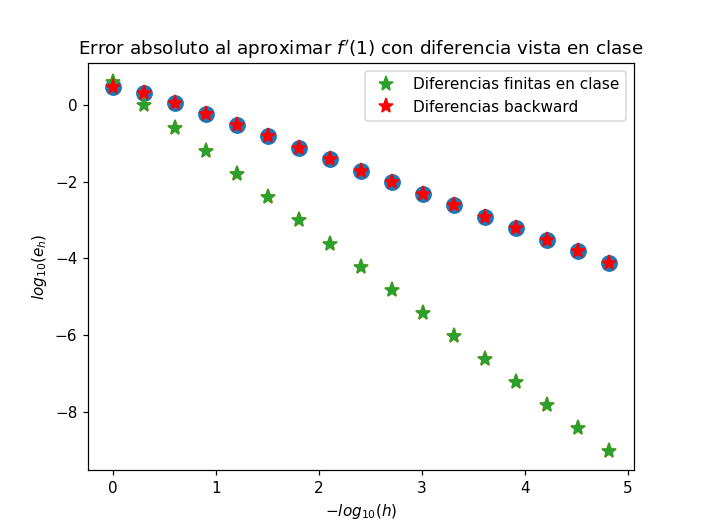

In [9]:
# Diferencias finitas: diferencias backward

# Para poder interactuar con los gráficos en el notebook
%matplotlib notebook

f = lambda x: 2*x**3 - x**2 + x    # Defino la función f
resultado = 5                      # El valor de f'(1)

h_vals = []                        # Inicializo una lista donde voy a guardar los valores de h    
errores_backward = []              # Inicializo una lista donde voy a guardar los errores absolutos
h = 1
while h > 1e-5:
    h_vals.append(h)               # Agrego h a la lista
    aprox = (f(1) - f(1-h))/h      # Calculo la aproximacion de la derivada
    error_absoluto = np.abs(resultado - aprox)   # Calculo el error absoluto (np.abs es para calcular el módulo)
    errores_backward.append(np.log10(error_absoluto))   # Agrego el logatirmo del error a la lista
    h = h / 2                      # Actualizo el valor de h para la próxima iteración

log_h_vals = -np.log10(h_vals)     # Armo un array con -log de los valores de h, para facilitar visualizacion
plt.plot(log_h_vals, errores_backward, 'o', ms=10) # Grafico -log(h) contra log(error)
plt.xlabel('$-log_{10}(h)$')       # Pongo etiquetas a los ejes del gráfico (se pueden usar comandos de Latex!)
plt.ylabel('$log_{10}(e_h)$')
plt.title("Error absoluto al aproximar $f'(1)$ con diferencia backward");  # Le pongo un título al gráfico


In [10]:
# Diferencias finitas: diferencias finitas vistas en clase

errores_clase = []
for h in h_vals:
    aprox = (-3*f(1) +4*f(1+h) - f(1+2*h))/(2*h)
    error_absoluto = np.abs(resultado - aprox)
    errores_clase.append(np.log10(np.abs(resultado - aprox)))

log_h_vals = -np.log10(h_vals)
plt.plot(log_h_vals, errores_clase, '*', ms=10)
plt.xlabel('$-log_{10}(h)$')
plt.ylabel('$log_{10}(e_h)$')
plt.title("Error absoluto al aproximar $f'(1)$ con diferencia vista en clase");

In [11]:
# Comparación de ambas:

plt.plot(log_h_vals, errores_clase, '*', label='Diferencias finitas en clase', ms=10)
plt.plot(log_h_vals, errores_backward, 'r*', label='Diferencias backward', ms=10)
plt.xlabel('$-log_{10}(h)$')
plt.ylabel('$log_{10}(e_h)$')
plt.title("Error absoluto al aproximar $f'(1)$ con diferencia vista en clase");
plt.legend()
